In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("insurance_file.csv")

In [3]:
df

,Unnamed: 0,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,0,45,0,0,0,0,155,57,0,0,0,25000
1,1,60,1,0,0,0,180,73,0,0,0,29000
2,2,36,1,1,0,0,158,59,0,0,1,23000
3,3,52,1,1,0,1,183,93,0,0,2,28000
4,4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...,...
981,981,18,0,0,0,0,169,67,0,0,0,15000
982,982,64,1,1,0,0,153,70,0,0,3,28000
983,983,56,0,1,0,0,155,71,0,0,1,29000
984,984,47,1,1,0,0,158,73,1,0,1,39000


In [3]:
df = df.iloc[:,1:]

In [5]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


### HIGH LEVEL OVERVIEW

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


#### Key Takeaway
- There is no null values present in the dataset.
- All the dataset is in correct format.

In [32]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


#### KEY TAKEAWAY:
#### AGE
- MEAN AGE IS AROUND 42 YEARS.
- STD OF AGE IS AROUND 14 YEARS.
- MIN AND MAX AGE IS 18 AND 66 RESPECTIVELY.
- 25% OF AGE IS LESS EQUAL TO 30 YEARS.
- 50% OF AGE IS EQUAL TO 50 YEARS.
- 75% OF AGE IS LESS THAN EQUAL TO 53 YEARS.


#### HIEGHT
- MEAN HIEGHT IS AROUND 168.
- STD OF HIEGHT IS AROUND 10.
- MIN AND MAX HIEGHT IS 145 AND 148 RESPECTIVELY.
- 25% OF HIEGHT IS LESS EQUAL TO 30 YEARS.
- 50% OF HIEGHT IS EQUAL TO 50 YEARS.
- 75% OF HIEGHT IS LESS THAN EQUAL TO 53 YEARS.

#### WEIGHT
- MEAN WEIGHT IS AROUND 77.
- STD OF WEIGHT IS AROUND 14.
- MIN AND MAX WEIGHT IS 51 AND 132 RESPECTIVELY.
- 25% OF WEIGHT IS LESS EQUAL TO 67.
- 50% OF WEIGHT IS EQUAL TO 75.
- 75% OF WEIGHT IS LESS THAN EQUAL TO 87.

#### PREMIUM PRICE
- MEAN PREMIUM PRICE IS AROUND 24336.
- STD OF PREMIUM PRICE IS AROUND 6248.184382.
- MIN AND MAX PREMIUM PRICE IS 15000 AND 40000 RESPECTIVELY.
- 25% OF PREMIUM PRICE IS LESS EQUAL TO 21000.
- 50% OF PREMIUM PRICE IS EQUAL TO 23000.
- 75% OF PREMIUM PRICE IS LESS THAN EQUAL TO 28000.

### FEATURE ENGINEERING

In [5]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [4]:
disease_columns = [
        'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
        'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
        'NumberOfMajorSurgeries' ]

def add_any_disease_feature(df):
    
    df['any_disease'] = df[disease_columns].apply(lambda row: 1 if any(row == 1) else 0, axis=1)
    return df

In [5]:
add_any_disease_feature(df)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,any_disease
0,45,0,0,0,0,155,57,0,0,0,25000,0
1,60,1,0,0,0,180,73,0,0,0,29000,1
2,36,1,1,0,0,158,59,0,0,1,23000,1
3,52,1,1,0,1,183,93,0,0,2,28000,1
4,38,0,0,0,1,166,88,0,0,1,23000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,0
982,64,1,1,0,0,153,70,0,0,3,28000,1
983,56,0,1,0,0,155,71,0,0,1,29000,1
984,47,1,1,0,0,158,73,1,0,1,39000,1


In [6]:
df["BMI"] = df.iloc[:,6] / ((df.iloc[:,5]/100)**2)

In [9]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,any_disease,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,0,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,1,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,1,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,1,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,1,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,0,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,1,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,1,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,1,29.242109


### EDA

#### UNIVARIATE ANALYSIS

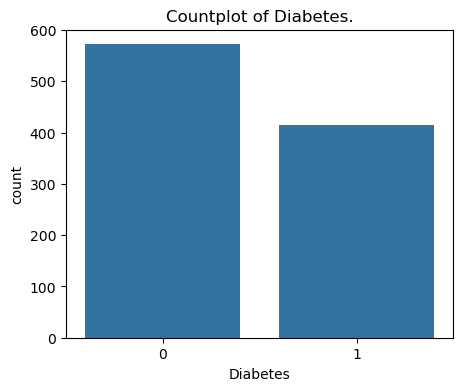

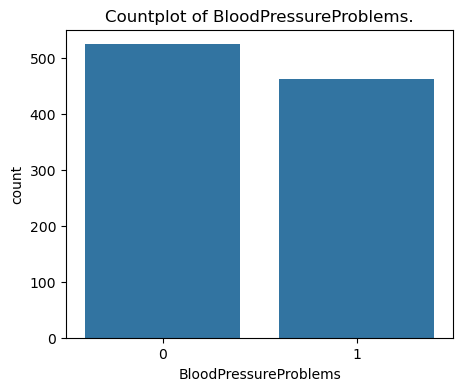

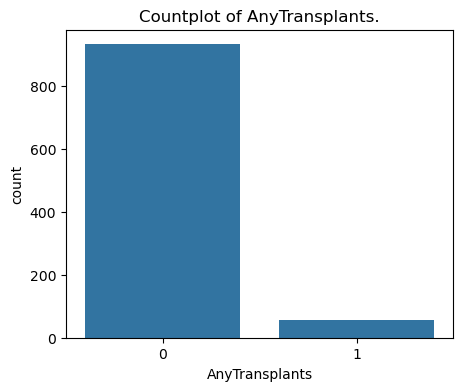

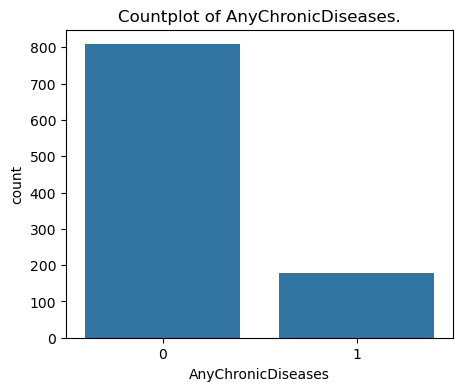

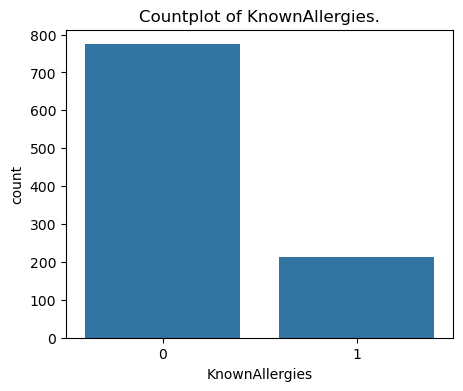

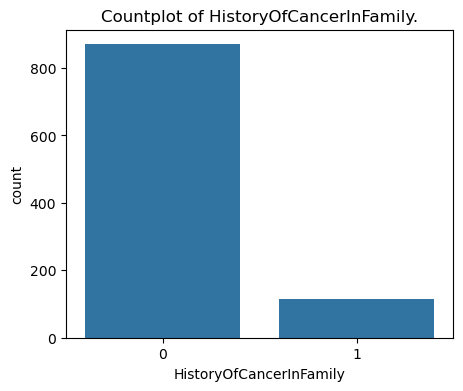

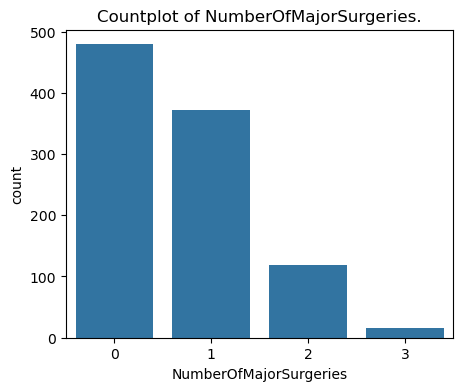

In [56]:
for i in disease_columns:

    plt.figure(figsize=(5 , 4))
    
    sns.countplot(x=i, data=df)
    
    plt.title(f"Countplot of {i}.")
    
    plt.show()

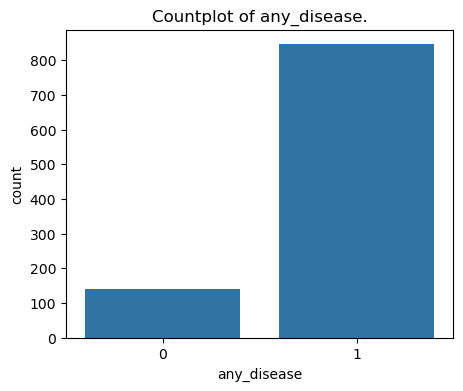

In [57]:
plt.figure(figsize=(5 , 4))
    
sns.countplot(x='any_disease', data=df)

plt.title("Countplot of any_disease.")

plt.show()

#### BIVARIATE ANALYSIS

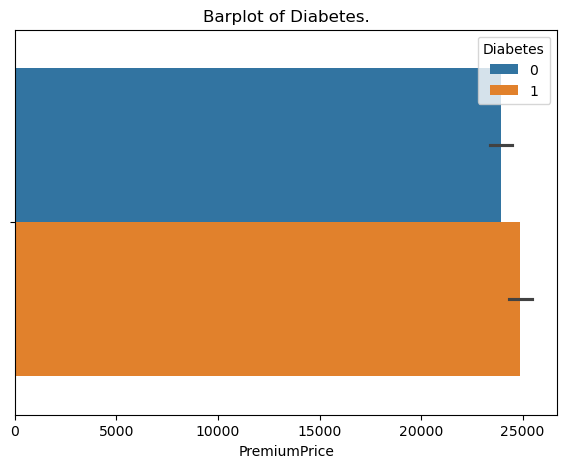

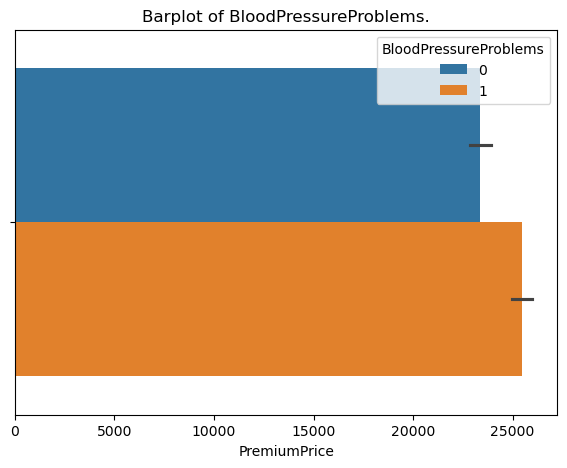

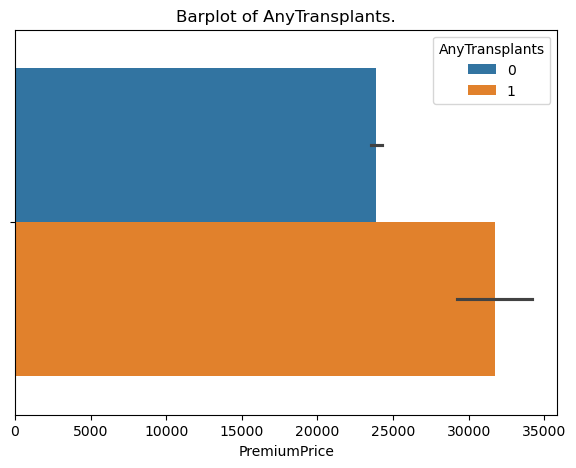

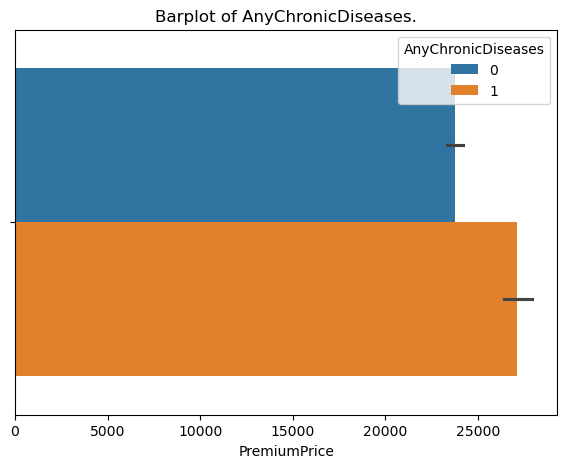

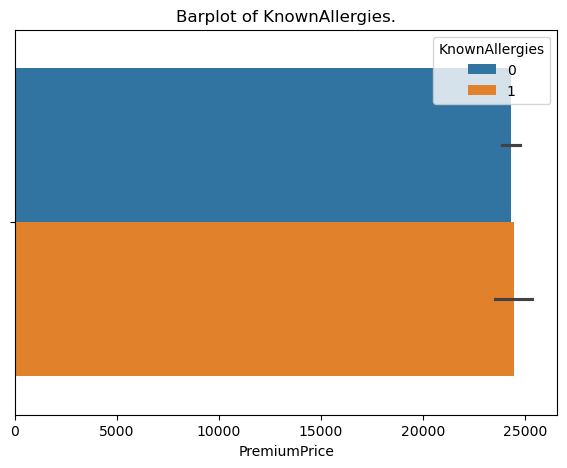

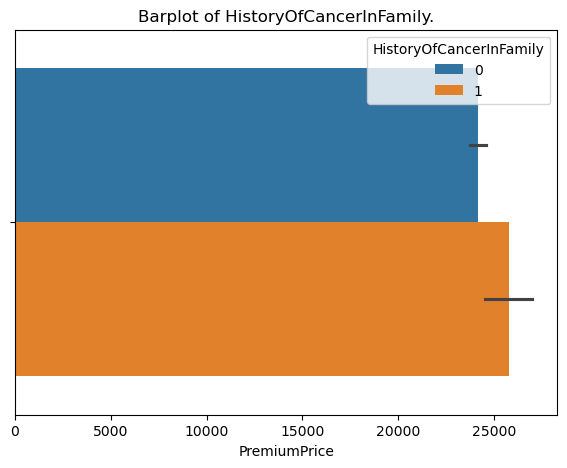

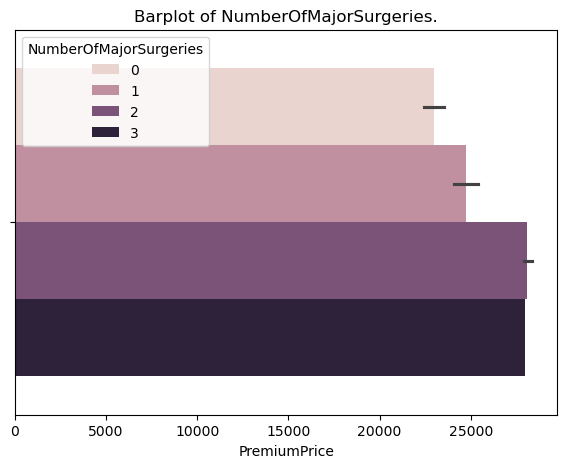

In [61]:
for i in disease_columns:

    plt.figure(figsize=(7 , 5))
    
    sns.barplot(x='PremiumPrice', hue=i, data=df)
    
    plt.title(f"Barplot of {i}.")
    
    plt.show()

<Axes: xlabel='PremiumPrice'>

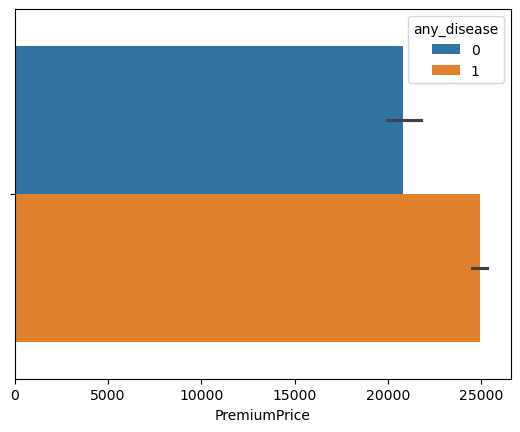

In [58]:
sns.barplot(data=df, x='PremiumPrice',hue='any_disease')

In [10]:
hist_col = ['Age',  'Height', 'Weight', 'PremiumPrice']

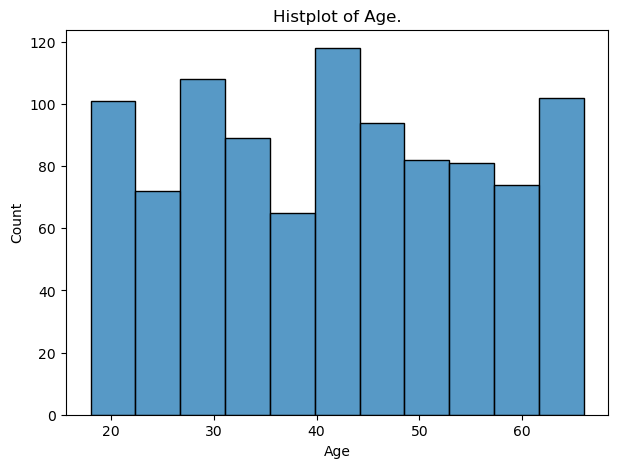

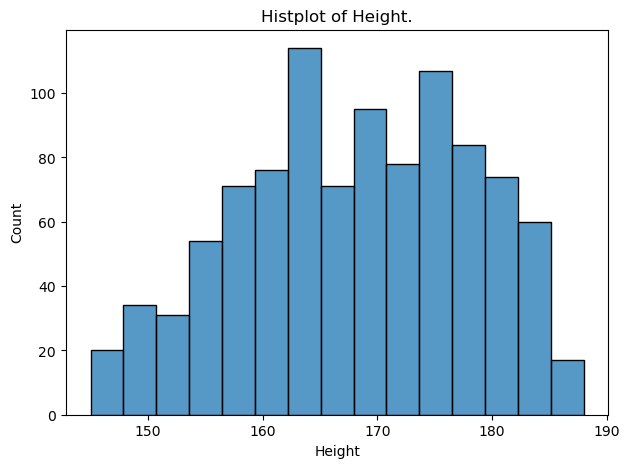

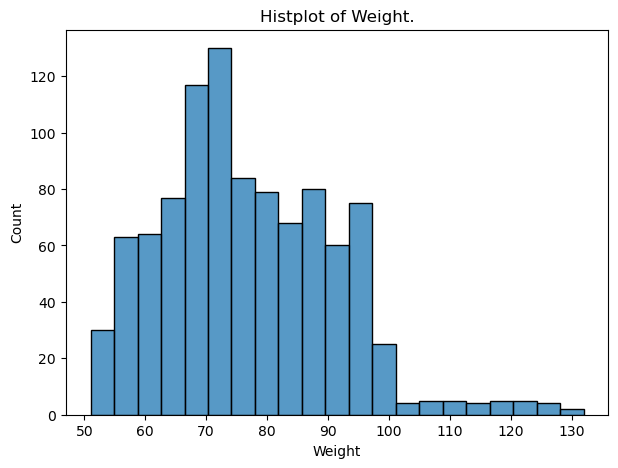

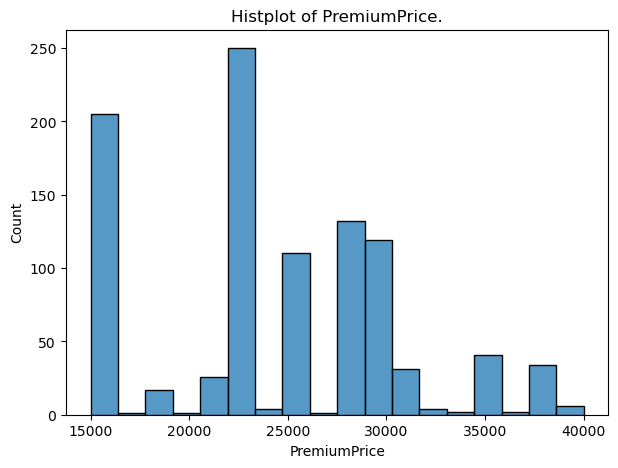

In [66]:
for i in hist_col:

    plt.figure(figsize=(7 , 5))
    
    sns.histplot(x= i, data=df)
    
    plt.title(f"Histplot of {i}.")
    
    plt.show()

In [71]:
disease_columns

['Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'KnownAllergies',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries']

<Figure size 800x600 with 0 Axes>

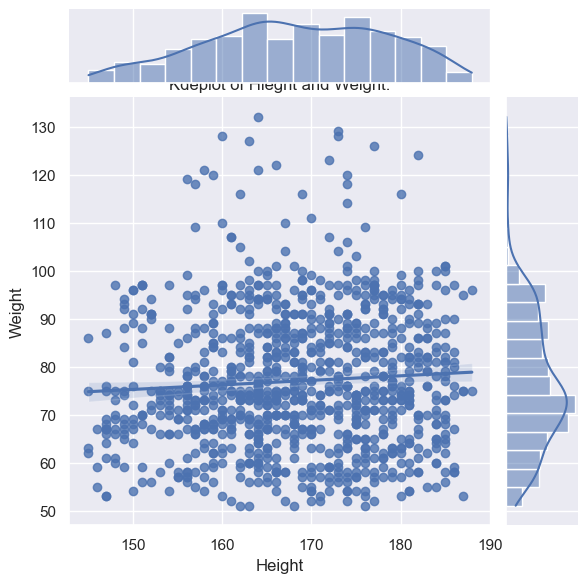

In [89]:
sns.set(style="darkgrid")

plt.figure(figsize=(8 , 6))
sns.jointplot(data = df, x='Height',y='Weight',kind = 'reg', palette='pastel')
plt.title(f"Kdeplot of Hieght and Weight.")

plt.show()

<Figure size 800x600 with 0 Axes>

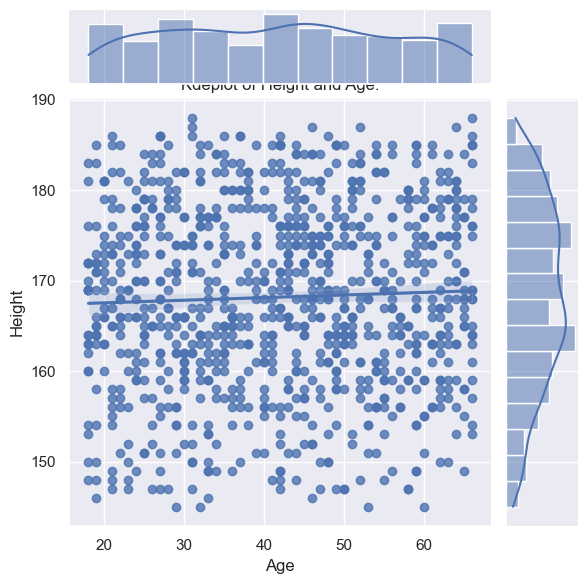

In [91]:
sns.set(style="darkgrid")

plt.figure(figsize=(8 , 6))
sns.jointplot(data = df, x='Age',y='Height',kind = 'reg', palette='pastel')
plt.title(f"Kdeplot of Height and Age.")

plt.show()

<Figure size 800x600 with 0 Axes>

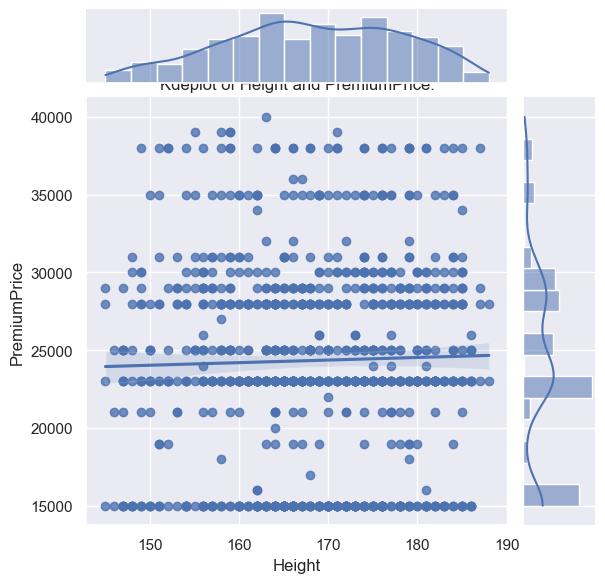

In [92]:
sns.set(style="darkgrid")

plt.figure(figsize=(8 , 6))
sns.jointplot(data = df, x='Height',y='PremiumPrice',kind = 'reg', palette='pastel')
plt.title(f"Kdeplot of Height and PremiumPrice.")

plt.show()

<Figure size 800x600 with 0 Axes>

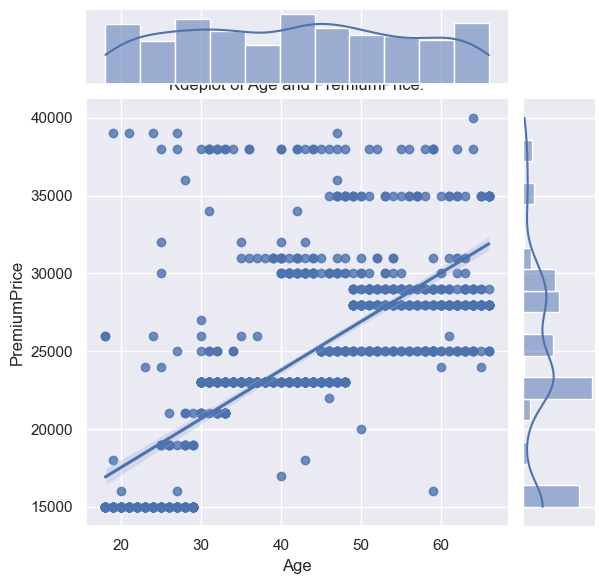

In [93]:
sns.set(style="darkgrid")

plt.figure(figsize=(8 , 6))
sns.jointplot(data = df, x='Age',y='PremiumPrice',kind = 'reg', palette='pastel')
plt.title(f"Kdeplot of Age and PremiumPrice.")

plt.show()

<Figure size 800x600 with 0 Axes>

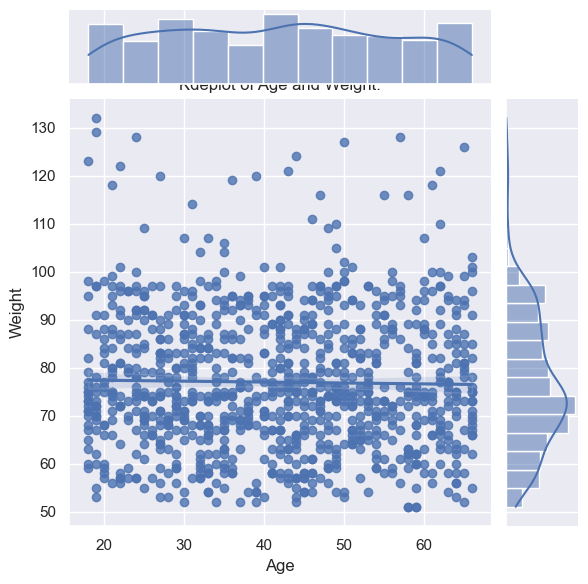

In [94]:
sns.set(style="darkgrid")

plt.figure(figsize=(8 , 6))
sns.jointplot(data = df, x='Age',y='Weight',kind = 'reg', palette='pastel')
plt.title(f"Kdeplot of Age and Weight.")

plt.show()

<Figure size 800x600 with 0 Axes>

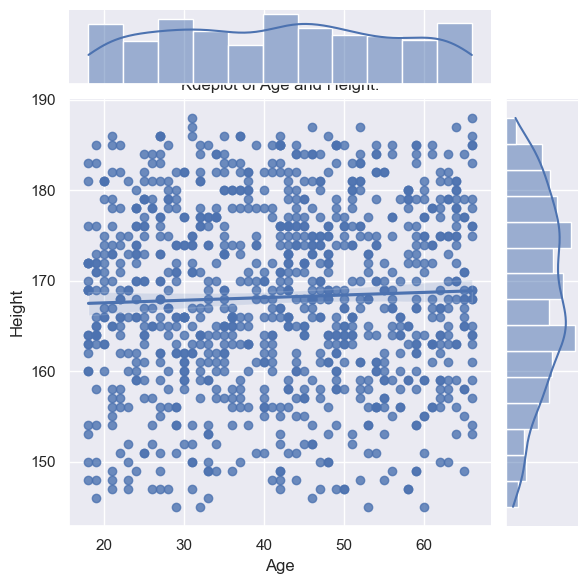

In [95]:
sns.set(style="darkgrid")

plt.figure(figsize=(8 , 6))
sns.jointplot(data = df, x='Age',y='Height',kind = 'reg', palette='pastel')
plt.title(f"Kdeplot of Age and Height.")

plt.show()

In [96]:
hist_col

['Age', 'Height', 'Weight', 'PremiumPrice']

<Figure size 800x600 with 0 Axes>

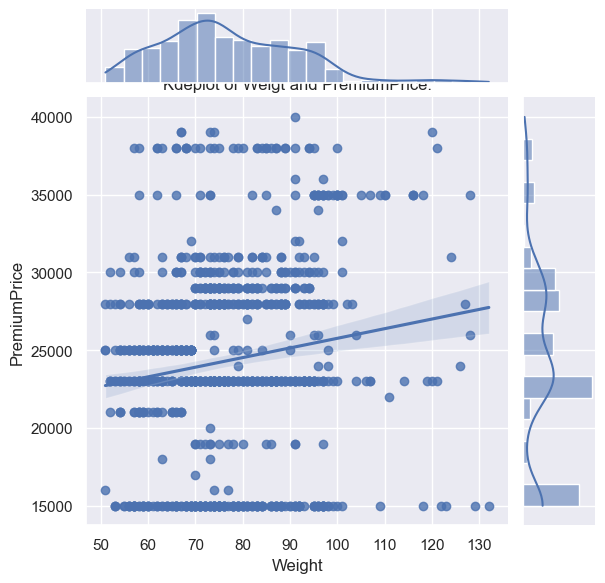

In [97]:
sns.set(style="darkgrid")

plt.figure(figsize=(8 , 6))
sns.jointplot(data = df, x='Weight',y='PremiumPrice',kind = 'reg', palette='pastel')
plt.title(f"Kdeplot of Weigt and PremiumPrice.")

plt.show()

In [129]:
cor = round(df.corr(),2)

<Axes: >

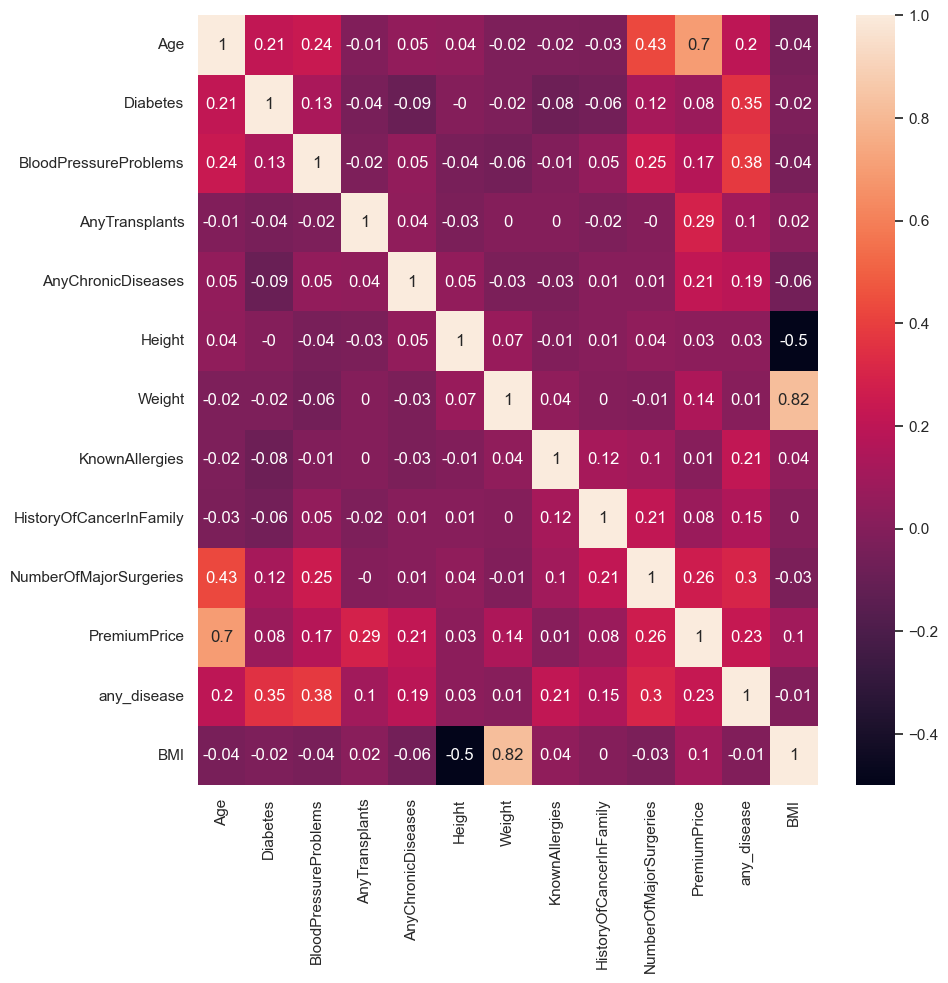

In [130]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot = True)

In [11]:
# import qq plot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

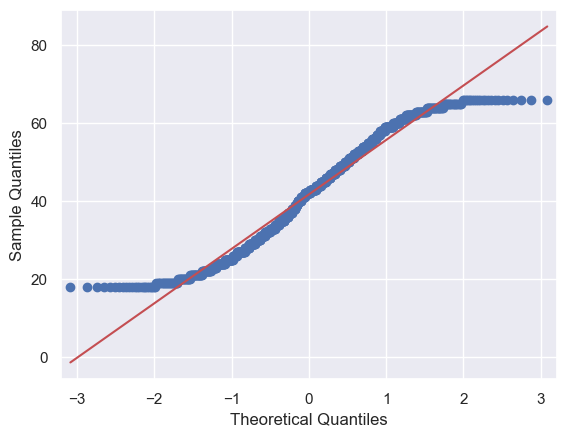

In [137]:
qqplot(df['Age'],line='s')
plt.show()

In [138]:
# H0 = normal
# Ha = not normal

# if data is normal we expect p-value to be high
alpha = 0.05

In [143]:
tstat,pvalue = shapiro(df['Age'])
tstat,pvalue

(np.float64(0.9588651464992526), np.float64(5.011311090917031e-16))

In [144]:
if pvalue < alpha:
    print("Since pvalue is less than alpha we will reject Null Hypothesis.")
    print("Data is Not Normally Distributed.")
else:
    print("Since pvalue is greater than alpha we will accept Null Hypothesis.")
    print("Data is Normally Distributed.")


Since pvalue is less than alpha we will reject Null Hypothesis.
Data is Not Normally Distributed.


In [148]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,any_disease,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,0,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,1,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,1,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,1,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,1,31.934969


#### KRUSKAL TEST

In [145]:
from scipy.stats import kruskal

In [150]:
diabetes_0_premium_ = df[df['Diabetes']== 0]['PremiumPrice']
diabetes_1_premium_ = df[df['Diabetes']== 1]['PremiumPrice']

In [151]:
bp_0_premium = df[df['BloodPressureProblems']== 0]['PremiumPrice']
bp_1_premium = df[df['BloodPressureProblems']== 1]['PremiumPrice']

In [152]:
transplant_0_premium = df[df['AnyTransplants']== 0]['PremiumPrice']
transplant_1_premium = df[df['AnyTransplants']== 1]['PremiumPrice']

In [153]:
chronic_0_premium = df[df['AnyChronicDiseases']== 0]['PremiumPrice']
chronic_1_premium = df[df['AnyChronicDiseases']== 1]['PremiumPrice']

In [154]:
allergy_0_premium = df[df['KnownAllergies']== 0]['PremiumPrice']
allergy_1_premium = df[df['KnownAllergies']== 1]['PremiumPrice']

In [155]:
cancer_0_premium = df[df['HistoryOfCancerInFamily']== 0]['PremiumPrice']
cancer_1_premium = df[df['HistoryOfCancerInFamily']== 1]['PremiumPrice']

In [156]:
disease_0_premium = df[df['any_disease']== 0]['PremiumPrice']
disease_1_premium = df[df['any_disease']== 1]['PremiumPrice']

In [157]:
surgery_0_premium = df[df['NumberOfMajorSurgeries']== 0]['PremiumPrice']
surgery_1_premium = df[df['NumberOfMajorSurgeries']== 1]['PremiumPrice']
surgery_2_premium = df[df['NumberOfMajorSurgeries']== 2]['PremiumPrice']
surgery_3_premium = df[df['NumberOfMajorSurgeries']== 3]['PremiumPrice']


In [161]:
def kruskal_test(a,b):
    tstats, pvalue = kruskal(a,b)
    alpha = 0.05

    print("Null - there is no significant difference between the medians of the groups being compared.")
    print("Alternate - at least one of the group medians is different from the others, means it is different.")
    print()
    
    if pvalue < alpha:
        print("Since pvalue is less than alpha we will reject Null Hypothesis.")
        print("Alternate - at least one of the group medians is different from the others, means it is different.")
    else:
        print("Since pvalue is greater than alpha we will accept Null Hypothesis.")
        print("Null - there is no significant difference between the medians of the groups being compared.")

In [158]:
kruskal(diabetes_0_premium_,diabetes_1_premium_)

KruskalResult(statistic=np.float64(7.412191636775454), pvalue=np.float64(0.006478335766833227))

In [162]:
kruskal_test(diabetes_0_premium_,diabetes_1_premium_)

Null - there is no significant difference between the medians of the groups being compared.
Alternate - at least one of the group medians is different from the others, means it is different.

Since pvalue is less than alpha we will reject Null Hypothesis.
Alternate - at least one of the group medians is different from the others, means it is different.


In [163]:
kruskal_test(bp_0_premium,bp_1_premium)

Null - there is no significant difference between the medians of the groups being compared.
Alternate - at least one of the group medians is different from the others, means it is different.

Since pvalue is less than alpha we will reject Null Hypothesis.
Alternate - at least one of the group medians is different from the others, means it is different.


In [164]:
kruskal_test(diabetes_0_premium_,diabetes_1_premium_)

Null - there is no significant difference between the medians of the groups being compared.
Alternate - at least one of the group medians is different from the others, means it is different.

Since pvalue is less than alpha we will reject Null Hypothesis.
Alternate - at least one of the group medians is different from the others, means it is different.


In [165]:
kruskal_test(transplant_0_premium,transplant_1_premium)

Null - there is no significant difference between the medians of the groups being compared.
Alternate - at least one of the group medians is different from the others, means it is different.

Since pvalue is less than alpha we will reject Null Hypothesis.
Alternate - at least one of the group medians is different from the others, means it is different.


In [166]:
kruskal_test(chronic_0_premium,chronic_1_premium)

Null - there is no significant difference between the medians of the groups being compared.
Alternate - at least one of the group medians is different from the others, means it is different.

Since pvalue is less than alpha we will reject Null Hypothesis.
Alternate - at least one of the group medians is different from the others, means it is different.


In [167]:
kruskal_test(allergy_0_premium,allergy_1_premium)

Null - there is no significant difference between the medians of the groups being compared.
Alternate - at least one of the group medians is different from the others, means it is different.

Since pvalue is greater than alpha we will accept Null Hypothesis.
Null - there is no significant difference between the medians of the groups being compared.


In [168]:
kruskal_test(cancer_0_premium,cancer_1_premium)

Null - there is no significant difference between the medians of the groups being compared.
Alternate - at least one of the group medians is different from the others, means it is different.

Since pvalue is less than alpha we will reject Null Hypothesis.
Alternate - at least one of the group medians is different from the others, means it is different.


In [169]:
kruskal_test(disease_0_premium,disease_1_premium)

Null - there is no significant difference between the medians of the groups being compared.
Alternate - at least one of the group medians is different from the others, means it is different.

Since pvalue is less than alpha we will reject Null Hypothesis.
Alternate - at least one of the group medians is different from the others, means it is different.


In [170]:

tstats, pvalue = kruskal(surgery_0_premium,surgery_1_premium,surgery_2_premium,surgery_3_premium)
alpha = 0.05

print("Null - there is no significant difference between the medians of the groups being compared.")
print("Alternate - at least one of the group medians is different from the others, means it is different.")
print()

if pvalue < alpha:
    print("Since pvalue is less than alpha we will reject Null Hypothesis.")
    print("Alternate - at least one of the group medians is different from the others, means it is different.")
else:
    print("Since pvalue is greater than alpha we will accept Null Hypothesis.")
    print("Null - there is no significant difference between the medians of the groups being compared.")

Null - there is no significant difference between the medians of the groups being compared.
Alternate - at least one of the group medians is different from the others, means it is different.

Since pvalue is less than alpha we will reject Null Hypothesis.
Alternate - at least one of the group medians is different from the others, means it is different.


#### KEY TAKEAWAY-
- GROUPS OF ALLERGY IS ONLY FEATURE WHERE AVERAGE PRICE OF 'PREMIUM PRICE' IS SAME AND REST HAS ALL DIFFERENT MEAN OF 'PREMIUM PRICE'.

### MODEL BUILDING

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  #(LASSO/RIDGE)
from sklearn.model_selection import cross_val_score  #(FOR CROSS VALIDATION)

import statsmodels.api as sm
from statsmodels.formula.api import ols


from sklearn.metrics import mean_squared_error #(metric)

from sklearn.preprocessing import PolynomialFeatures # FOR USING POLYNOMIAL FEATURES

from sklearn.linear_model import Lasso, Ridge  # FOR REGULARISATION

from sklearn.model_selection import GridSearchCV  # FOR HYPERPARAMETER TUNING

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [13]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,any_disease,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,0,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,1,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,1,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,1,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,1,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,0,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,1,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,1,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,1,29.242109


In [8]:
y = df['PremiumPrice']
X = df.drop(columns=['PremiumPrice'])

In [15]:
X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,any_disease,BMI
0,45,0,0,0,0,155,57,0,0,0,0,23.725286
1,60,1,0,0,0,180,73,0,0,0,1,22.530864
2,36,1,1,0,0,158,59,0,0,1,1,23.634033
3,52,1,1,0,1,183,93,0,0,2,1,27.770313
4,38,0,0,0,1,166,88,0,0,1,1,31.934969


In [106]:
y

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64

#### REMOVING CORELATION DATA

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
def cal_vif(x):
    vif = pd.DataFrame()
    vif['features'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['vif'] = round(vif['vif'],2)
    vif = vif.sort_values(by='vif',ascending=False)
    return vif

cal_vif(X)

,features,vif
6,Weight,127.39
11,BMI,76.24
5,Height,43.91
0,Age,13.12
10,any_disease,11.49
9,NumberOfMajorSurgeries,2.50
2,BloodPressureProblems,2.36
1,Diabetes,2.18
7,KnownAllergies,1.42
4,AnyChronicDiseases,1.33


In [11]:
X = X.drop(columns=['Weight'])

In [12]:
def cal_vif(x):
    vif = pd.DataFrame()
    vif['features'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['vif'] = round(vif['vif'],2)
    vif = vif.sort_values(by='vif',ascending=False)
    return vif

cal_vif(X)

,features,vif
5,Height,27.36
10,BMI,17.16
0,Age,13.00
9,any_disease,11.48
8,NumberOfMajorSurgeries,2.49
2,BloodPressureProblems,2.35
1,Diabetes,2.18
6,KnownAllergies,1.42
4,AnyChronicDiseases,1.33
7,HistoryOfCancerInFamily,1.24


In [13]:
X = X.drop(columns=['Height'])

In [14]:
def cal_vif(x):
    vif = pd.DataFrame()
    vif['features'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['vif'] = round(vif['vif'],2)
    vif = vif.sort_values(by='vif',ascending=False)
    return vif

cal_vif(X)

,features,vif
8,any_disease,10.41
0,Age,10.19
9,BMI,9.11
7,NumberOfMajorSurgeries,2.45
2,BloodPressureProblems,2.34
1,Diabetes,2.17
5,KnownAllergies,1.42
4,AnyChronicDiseases,1.33
6,HistoryOfCancerInFamily,1.24
3,AnyTransplants,1.09


THE SCORES SEEMS TO BE SATISFACTORY SO LETTING IT NOW FOR NOW.

In [22]:
X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,any_disease,BMI
0,45,0,0,0,0,0,0,0,0,23.725286
1,60,1,0,0,0,0,0,0,1,22.530864
2,36,1,1,0,0,0,0,1,1,23.634033
3,52,1,1,0,1,0,0,2,1,27.770313
4,38,0,0,0,1,0,0,1,1,31.934969


In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

In [24]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,any_disease,BMI
398,66,1,1,0,0,0,0,2,1,26.346494
523,35,0,1,0,0,0,0,0,1,30.110991
809,48,0,0,0,1,0,0,1,1,36.649821
501,26,0,0,0,1,0,0,1,1,21.561909
430,58,1,1,0,0,0,0,0,1,24.524346
...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,0,0,0,0,24.141519
270,46,0,1,0,1,0,0,1,1,21.048048
860,61,1,0,0,0,0,0,3,1,25.461981
435,37,1,0,0,0,1,1,1,1,20.808561


In [38]:
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')

#### SCALING

In [16]:
Xtraincol = X_train.columns

In [17]:
# Fit scaling on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transforming val and test using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# FIXING THE NAMES
X_train_scaled = pd.DataFrame(X_train_scaled, columns=Xtraincol)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=Xtraincol)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=Xtraincol)

In [18]:
# FITTING THE MODEL INTO LINEAR REGRESSION
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train_scaled,y_train)

LinearRegression()

In [19]:
# CHEKING SCORE ON TRAINING DATA

y_train_pred = lr_model_1.predict(X_train_scaled)  # Predicting on validation set
train_mse = mean_squared_error(y_train, y_train_pred)  # Calculate validation error
print("Validation MSE:", train_mse)

Validation MSE: 14785049.247446507


In [20]:
# CROSS VALIDATION SCORE ON SINGLE CV DATASETS

y_val_pred = lr_model_1.predict(X_val)  # Predicting on validation set
val_mse = mean_squared_error(y_val, y_val_pred)  # Calculate validation error
print("Validation MSE:", val_mse)
print("R² Score:", r2_score(y_val, y_val_pred))

Validation MSE: 47062392244.97432
R² Score: -1062.7774892486748


In [199]:
print("R² Score:", r2_score(y_val, y_val_pred))


R² Score: -29.83085970243263


In [200]:
y_val.describe()

count      148.000000
mean     25222.972973
std       6673.962959
min      15000.000000
25%      22750.000000
50%      25000.000000
75%      30000.000000
max      39000.000000
Name: PremiumPrice, dtype: float64

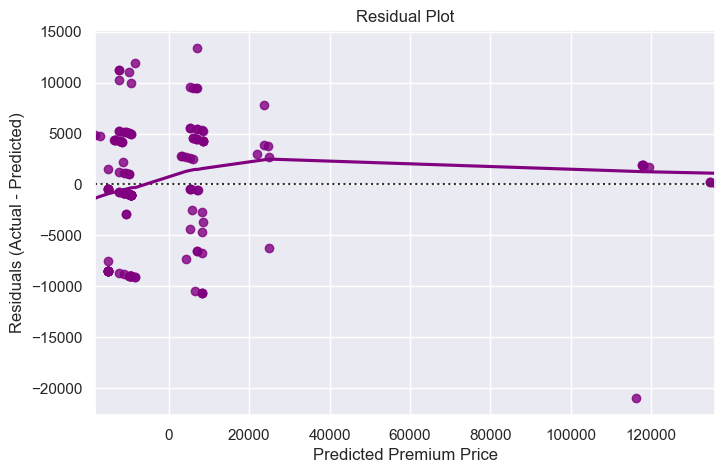

In [197]:
plt.figure(figsize=(8, 5))
sns.residplot(x=y_val_pred, y=y_val, color='purple', lowess=True)  # Add lowess for smoother curve
plt.xlabel("Predicted Premium Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

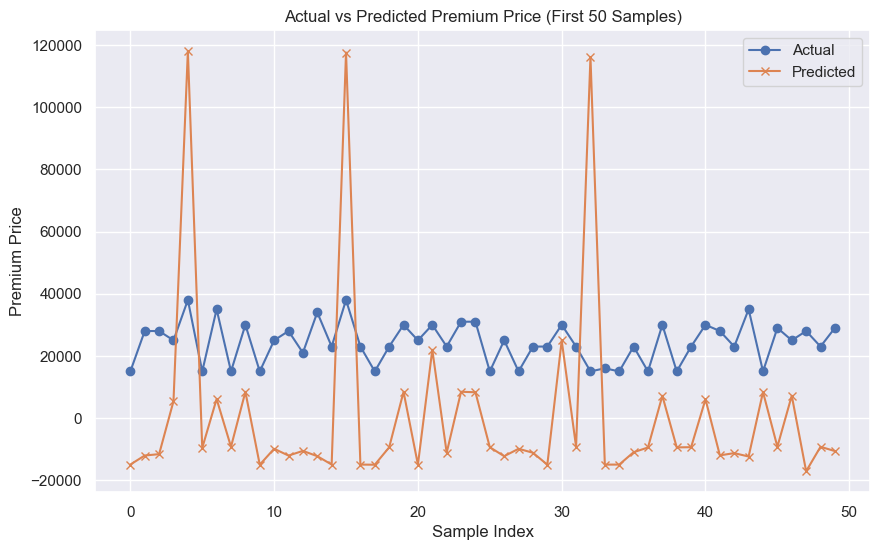

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values[:50], label='Actual', marker='o')
plt.plot(y_val_pred[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted Premium Price (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Premium Price')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error

# Define models and parameter grids
models = {
    'Ridge': (Ridge(), {'model__alpha': [0.01, 0.1, 1, 10, 100]}),
    'Lasso': (Lasso(max_iter=10000), {'model__alpha': [0.01, 0.1, 1, 10]}),
    'ElasticNet': (ElasticNet(max_iter=10000), {
        'model__alpha': [0.01, 0.1, 1, 10],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    })
}

best_models = {}

# Loop through each model
for name, (regressor, params) in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', regressor)
    ])
    
    regulisation_grid_1 = GridSearchCV(pipe, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
    regulisation_grid_1.fit(X_train, y_train)
    
    print(f"\n{name} Best R² Score: {regulisation_grid_1.best_score_:.4f}")
    print(f"{name} Best Params: {regulisation_grid_1.best_params_}")
    
    best_models[name] = regulisation_grid_1.best_estimator_



Ridge Best R² Score: 0.5796
Ridge Best Params: {'model__alpha': 10}

Lasso Best R² Score: 0.5798
Lasso Best Params: {'model__alpha': 10}

ElasticNet Best R² Score: 0.5796
ElasticNet Best Params: {'model__alpha': 0.1, 'model__l1_ratio': 0.9}


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


# Define models
models = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=10.0))
    ]),
    "Lasso Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=10.))
    ]),
    "Random Forest": Pipeline([
        ("model", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
    ])
}

# Evaluate models
def evaluate(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return round(scores.mean(), 4), round(scores.std(), 4)

results = {name: evaluate(pipe, X_train, y_train) for name, pipe in models.items()}
results


{'Linear Regression': (np.float64(0.5795), np.float64(0.0791)),
 'Ridge Regression': (np.float64(0.5796), np.float64(0.0783)),
 'Lasso Regression': (np.float64(0.5798), np.float64(0.0791)),
 'Random Forest': (np.float64(0.6693), np.float64(0.1124))}

#### LASSO

In [23]:

# 1. Create a pipeline: scale features + apply Lasso
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(max_iter=10000))  # increase max_iter to ensure convergence
])

# 2. Define hyperparameter grid: alpha is the regularization strength
param_grid = {
    'model__alpha': [0.1, 1,3,5,7,8,9, 10]
}

# 3. Set up GridSearchCV
lasso_1 = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 4. Fit on training data
lasso_1.fit(X_train_scaled, y_train)

# 5. Show best model and parameters
print("Best R² Score:", lasso_1.best_score_)
print("Best Alpha (Regularization Strength):", lasso_1.best_params_['model__alpha'])




Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best R² Score: 0.5797532010825103
Best Alpha (Regularization Strength): 10


In [37]:
# 6. Predict on validation set
# y_val_pred = grid.best_estimator_.predict(X_val_scaled)

In [24]:
# Predicting on validation set
y_val_pred = lasso_1.predict(X_val_scaled)

# Evaluating using common regression metrics

r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)

print("Validation R² Score:", r2)
print("Validation MSE:", mse)
print("Validation RMSE:", rmse)
print("Validation MAE:", mae)

Validation R² Score: 0.6377808993450849
Validation MSE: 16024871.334402217
Validation RMSE: 4003.107709567932
Validation MAE: 2900.6360923857


In [26]:
lasso_2 = Lasso(alpha=5.0)  # alpha is the regularization strength
lasso_2.fit(X_train_scaled, y_train)

Lasso(alpha=5.0)

In [27]:
# Predicting on validation set
y_val_pred = lasso_2.predict(X_val_scaled)

# Evaluating using common regression metrics

r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)

print("Validation R² Score:", r2)
print("Validation MSE:", mse)
print("Validation RMSE:", rmse)
print("Validation MAE:", mae)

Validation R² Score: 0.6386372450958182
Validation MSE: 15986985.893108664
Validation RMSE: 3998.372905709104
Validation MAE: 2896.1965385802405


#### RANDOM FORREST

In [43]:

# Define pipeline (scaling not necessary for trees but kept for consistency)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # optional for trees
    ('model', RandomForestRegressor(random_state=42))
    ])

# Define parameter grid
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2,10],
    'model__max_features': ['auto', 'sqrt']
}

# GridSearchCV
rf_grid_1 = GridSearchCV(estimator=pipe, param_grid=param_grid,cv=5,scoring='r2',n_jobs=-1,verbose=1)

# Fit
rf_grid_1.fit(X_train, y_train)

# Best results
print("Best R² Score:", rf_grid_1.best_score_)
print("Best Params:", rf_grid_1.best_params_)

# Best model
best_rf_model = rf_grid_1.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best R² Score: 0.6951434029753047
Best Params: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}


In [23]:
# Predicting on validation set
y_val_pred = best_rf_model.predict(X_val_scaled)

# Evaluating using common regression metrics

r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)

print("Validation R² Score:", r2)
print("Validation MSE:", mse)
print("Validation RMSE:", rmse)
print("Validation MAE:", mae)

Validation R² Score: -1.2593101379213096
Validation MSE: 99953741.25560549
Validation RMSE: 9997.68679523446
Validation MAE: 8196.203267174255


In [42]:
99953741.25560549 < 15986985.893108664

False

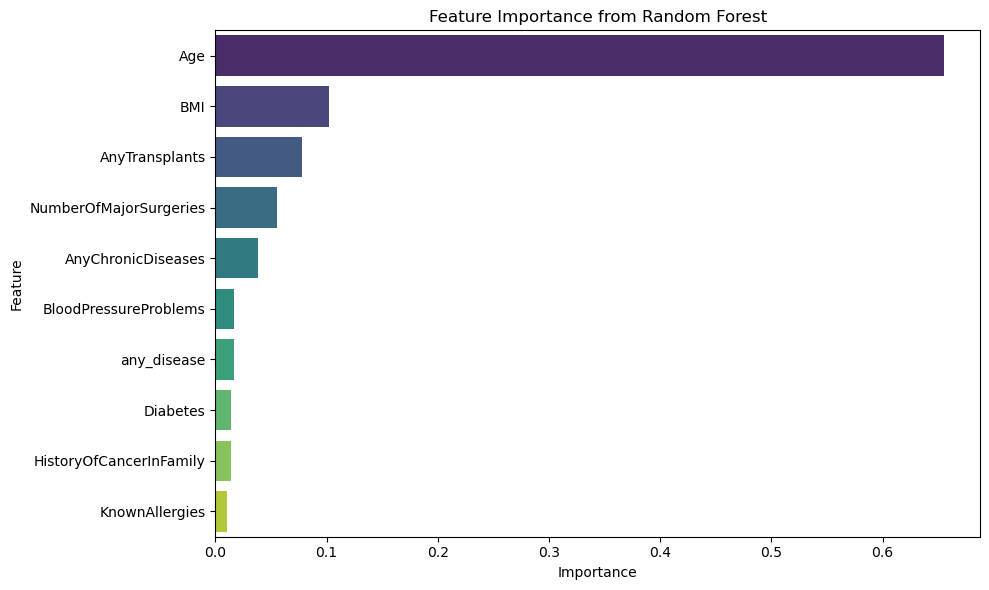

In [47]:
# Get feature importances
importances = best_rf_model.named_steps['model'].feature_importances_

# Get feature names (make sure to use correct scaler step name if you're using a pipeline)
feature_names = X_train.columns  # or use X_train_scaled.columns if scaled

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)



# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


#### KEY TAKEAWAY-
- AGE AND BMI ARE THE LEADING FEATURES WITH THE IMPORTANCE VALUES.
- RANDOM FORREST IS UNDERPERFORMING MAY BE BECAUSE THERE IS NOT ENOUGH DATA FOR RF TO TRAIN ON THAT IS WHY SIMPLE MODEL IS PERFORMING BETTER.

#### XGBOOST

In [28]:
from xgboost import XGBRegressor


In [29]:
pipe = Pipeline([
    ('scaler', StandardScaler()),  # optional: XGBoost can handle unscaled data
    ('model', XGBRegressor(objective='reg:absoluteerror', random_state=42))      # as data has an outlier using absouteerror(MAE) as objective.
])

params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__subsample': [ 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [ 0.1, 1],  # L1 regularization
    'model__reg_lambda': [1, 5]    # L2 regularization
}


In [30]:
xgb_grid1 = GridSearchCV(pipe, param_grid=params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
xgb_grid1.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=N...
                                                     num_parallel_tree=None,
                                                     objective='reg:absoluteerror', ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.6, 0.8, 1.0],
                         'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7, 10],
                         'model__n_estimators': [100, 200, 300],
                         'model__reg_alpha': [0.1, 1],
                         'model__reg_lambda': [1, 5],
                         'model__subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=2)

In [31]:
print("Best R2 Score: ", xgb_grid1.best_score_)
print("Best Params: ", xgb_grid1.best_params_)


Best R2 Score:  -1440.7201416015625
Best Params:  {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__reg_alpha': 1, 'model__reg_lambda': 1, 'model__subsample': 1.0}


In [32]:
# Predicting on validation set
y_val_pred = xgb_grid1.predict(X_val_scaled)

# Evaluating using common regression metrics

r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)

print("Validation R² Score:", r2)
print("Validation MSE:", mse)
print("Validation RMSE:", rmse)
print("Validation MAE:", mae)

Validation R² Score: 0.7269966006278992
Validation MSE: 12077896.0
Validation RMSE: 3475.3267472282373
Validation MAE: 1597.322265625


### TREATING OUTLIERS

In [57]:
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,any_disease,BMI
0,45,0,0,0,0,0,0,0,0,23.725286
1,60,1,0,0,0,0,0,0,1,22.530864
2,36,1,1,0,0,0,0,1,1,23.634033
3,52,1,1,0,1,0,0,2,1,27.770313
4,38,0,0,0,1,0,0,1,1,31.934969
...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,0,0,0,0,23.458562
982,64,1,1,0,0,0,0,3,1,29.903029
983,56,0,1,0,0,0,0,1,1,29.552549
984,47,1,1,0,0,1,0,1,1,29.242109


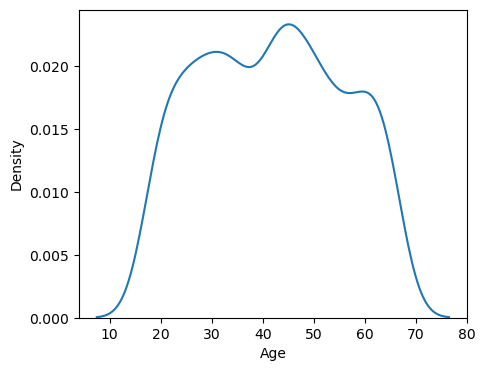

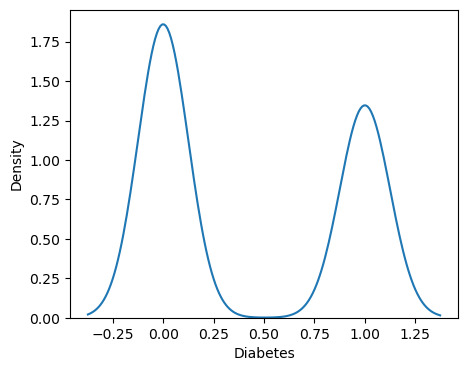

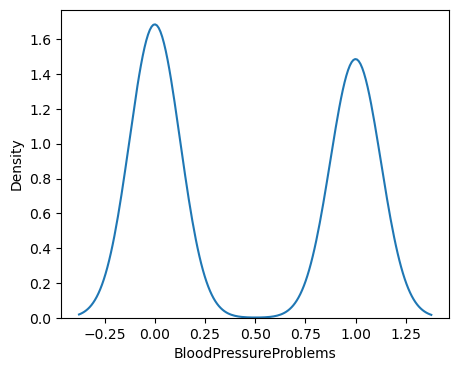

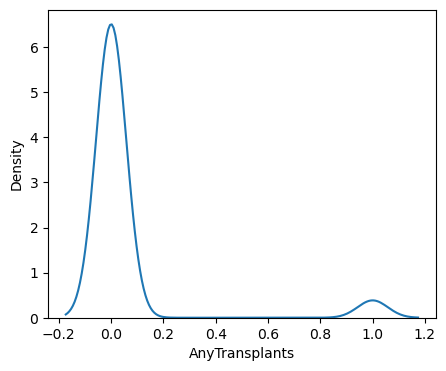

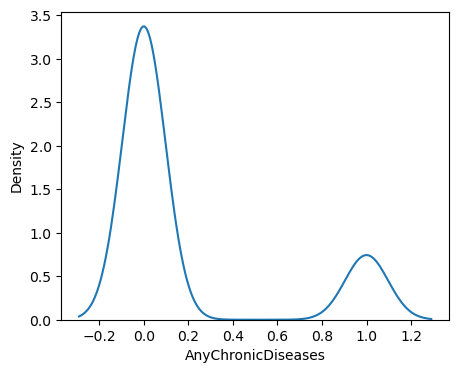

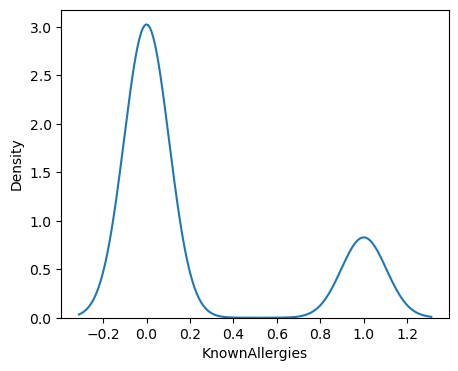

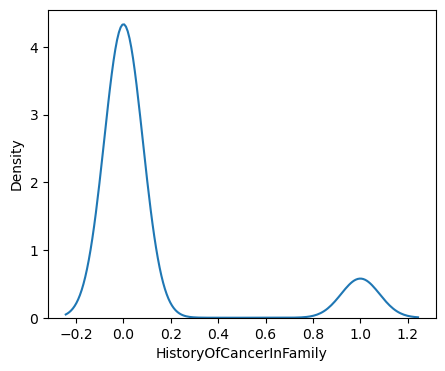

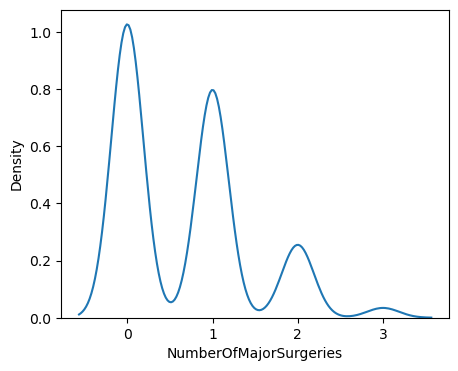

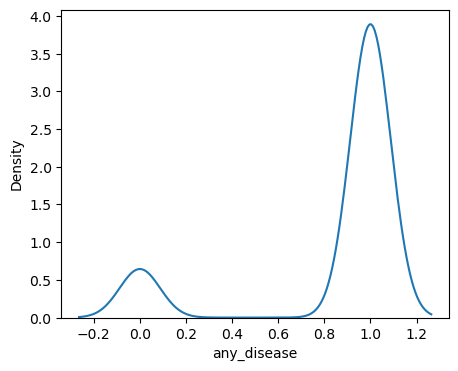

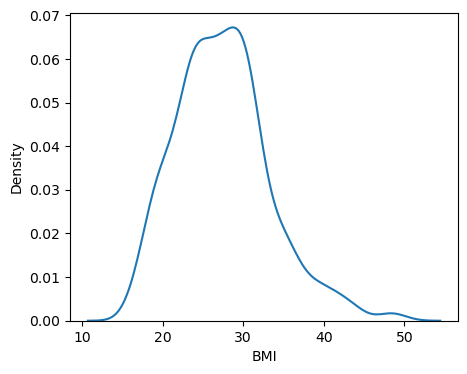

In [64]:
for i in X.columns:
    plt.figure(figsize=(5,4))
    sns.kdeplot(data = X, x = i)
    plt.show()

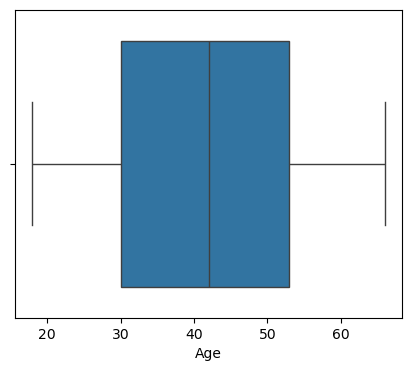

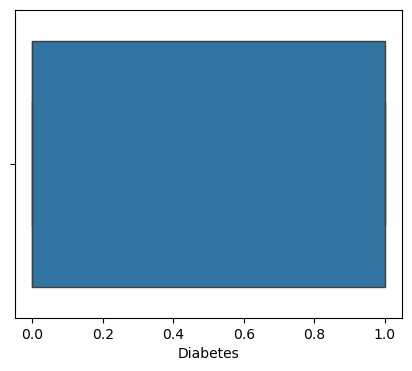

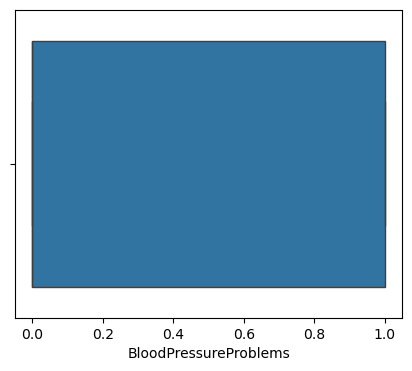

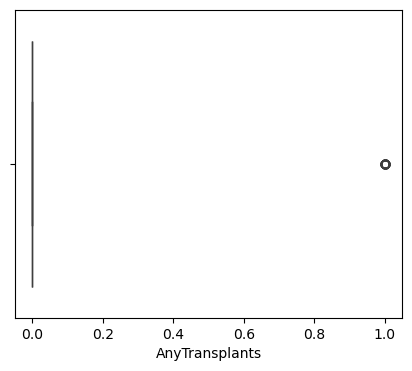

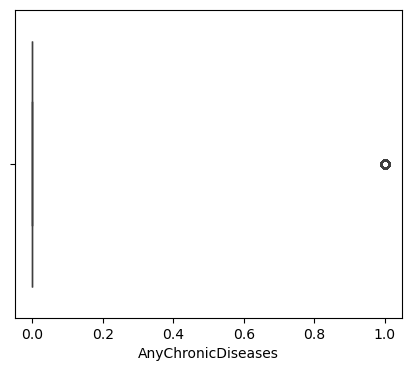

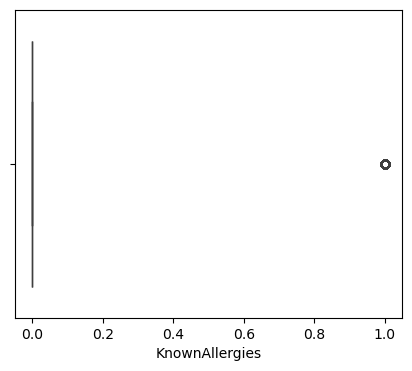

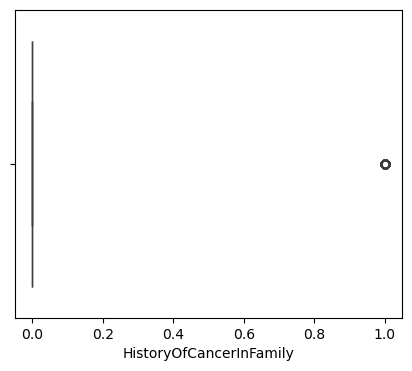

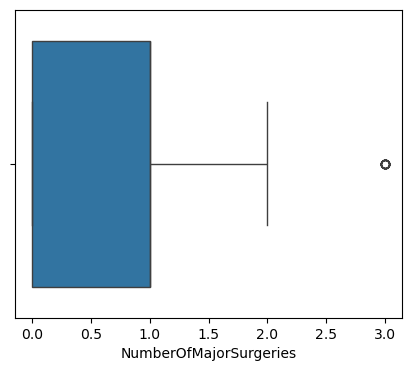

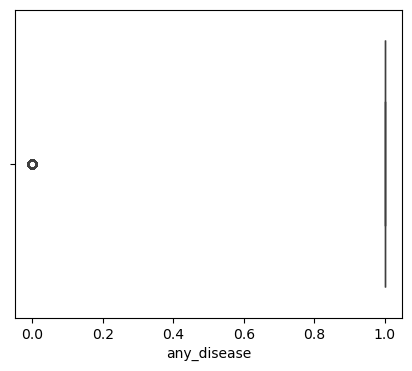

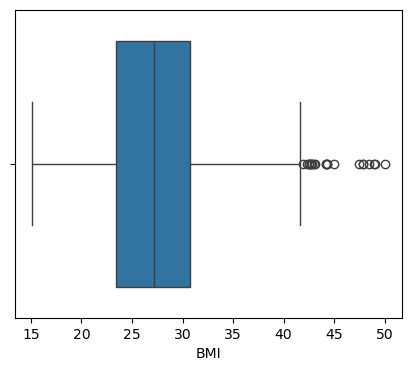

In [62]:
for i in X.columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(data = X, x = i)
    plt.show()

In [63]:
print(df[['Age', 'BMI']].skew())

Age    0.029895
BMI    0.659701
dtype: float64


#### KEY TAKEAWAY-
- AS SKEWNESS OF AGE AND BMI IS BETWEEN 0 AND 1 THERE IS NO NEED TO APPLY TRANSFORMATION.
- NO OUTLIER TREATMENT IS REQUIRED.

### REMODELING
#### SELECTING TOP 3 CONTRIBUTING FEATURES FROM RANDOM FOREST TO REMODEL.

In [65]:
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,any_disease,BMI
0,45,0,0,0,0,0,0,0,0,23.725286
1,60,1,0,0,0,0,0,0,1,22.530864
2,36,1,1,0,0,0,0,1,1,23.634033
3,52,1,1,0,1,0,0,2,1,27.770313
4,38,0,0,0,1,0,0,1,1,31.934969
...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,0,0,0,0,23.458562
982,64,1,1,0,0,0,0,3,1,29.903029
983,56,0,1,0,0,0,0,1,1,29.552549
984,47,1,1,0,0,1,0,1,1,29.242109


In [72]:
new_X = X.loc[:, ['Age', 'BMI', 'AnyTransplants']]

In [73]:
X_train, X_temp, y_train, y_temp = train_test_split(
    new_X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

#### SCALLING

In [74]:
Xtraincol = X_train.columns

In [75]:
# Fit scaling on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transforming val and test using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# FIXING THE NAMES
X_train_scaled = pd.DataFrame(X_train_scaled, columns=Xtraincol)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=Xtraincol)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=Xtraincol)

In [76]:
# FITTING THE MODEL INTO LINEAR REGRESSION
lr_model_2 = LinearRegression()
lr_model_2.fit(X_train_scaled,y_train)

LinearRegression()

In [78]:
# CHEKING SCORE ON TRAINING DATA

y_train_pred = lr_model_2.predict(X_train_scaled)  # Predicting on validation set
train_mse = mean_squared_error(y_train, y_train_pred)  # Calculate validation error
print("Validation MSE:", train_mse)

Validation MSE: 16280864.023560248


In [79]:
# CROSS VALIDATION SCORE ON SINGLE CV DATASETS

y_val_pred = lr_model_2.predict(X_val)  # Predicting on validation set
val_mse = mean_squared_error(y_val, y_val_pred)  # Calculate validation error
print("Validation MSE:", val_mse)
print("R² Score:", r2_score(y_val, y_val_pred))


Validation MSE: 42355578827.21899
R² Score: -956.3867615134857


In [80]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error

# Define models and parameter grids
models = {
    'Ridge': (Ridge(), {'model__alpha': [0.01, 0.1, 1, 10, 100]}),
    'Lasso': (Lasso(max_iter=10000), {'model__alpha': [0.01, 0.1, 1, 10]}),
    'ElasticNet': (ElasticNet(max_iter=10000), {
        'model__alpha': [0.01, 0.1, 1, 10],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    })
}

best_models = {}

# Loop through each model
for name, (regressor, params) in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', regressor)
    ])
    
    regularisation_grid_2 = GridSearchCV(pipe, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
    regularisation_grid_2.fit(X_train, y_train)
    
    print(f"\n{name} Best R² Score: {regularisation_grid_2.best_score_:.4f}")
    print(f"{name} Best Params: {grid_2.best_params_}")
    
    best_models[name] = regularisation_grid_2.best_estimator_



Ridge Best R² Score: 0.5484
Ridge Best Params: {'model__alpha': 10}

Lasso Best R² Score: 0.5483
Lasso Best Params: {'model__alpha': 1}

ElasticNet Best R² Score: 0.5484
ElasticNet Best Params: {'model__alpha': 0.1, 'model__l1_ratio': 0.9}


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


# Define models
multi_models = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=10.0))
    ]),
    "Lasso Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=10.))
    ]),
    "Random Forest": Pipeline([
        ("model", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
    ])
}

# Evaluate models
def evaluate(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return round(scores.mean(), 4), round(scores.std(), 4)

results = {name: evaluate(pipe, X_train, y_train) for name, pipe in multi_models.items()}
results


{'Linear Regression': (np.float64(0.5795), np.float64(0.0791)),
 'Ridge Regression': (np.float64(0.5796), np.float64(0.0783)),
 'Lasso Regression': (np.float64(0.5798), np.float64(0.0791)),
 'Random Forest': (np.float64(0.6693), np.float64(0.1124))}

#### LASSO

In [82]:

# 1. Create a pipeline: scale features + apply Lasso
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(max_iter=10000))  # increase max_iter to ensure convergence
])

# 2. Define hyperparameter grid: alpha is the regularization strength
param_grid = {
    'model__alpha': [0.1, 1,3,5,7,8,9, 10]
}

# 3. Set up GridSearchCV
lasso_grid_3 = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 4. Fit on training data
lasso_grid_3.fit(X_train_scaled, y_train)

# 5. Show best model and parameters
print("Best R² Score:", lasso_grid_3.best_score_)
print("Best Alpha (Regularization Strength):", lasso_grid_3.best_params_['model__alpha'])




Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best R² Score: 0.5483259411231751
Best Alpha (Regularization Strength): 5


In [83]:
# 6. Predict on validation set
y_val_pred = lasso_grid_3.best_estimator_.predict(X_val_scaled)

In [84]:
# Predicting on validation set
#y_val_pred = grid.predict(X_val_scaled)

# Evaluating using common regression metrics

r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)

print("Validation R² Score:", r2)
print("Validation MSE:", mse)
print("Validation RMSE:", rmse)
print("Validation MAE:", mae)

Validation R² Score: 0.5747927041454298
Validation MSE: 18811520.966726035
Validation RMSE: 4337.225030676415
Validation MAE: 3220.172651468645


In [85]:
lasso_model_4 = Lasso(alpha=5.0)  # alpha is the regularization strength
lasso_model_4.fit(X_train_scaled, y_train)

Lasso(alpha=5.0)

In [86]:
# Predicting on validation set
y_val_pred = lasso_model_4.predict(X_val_scaled)

# Evaluating using common regression metrics

r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)

print("Validation R² Score:", r2)
print("Validation MSE:", mse)
print("Validation RMSE:", rmse)
print("Validation MAE:", mae)

Validation R² Score: 0.5747927041454298
Validation MSE: 18811520.966726035
Validation RMSE: 4337.225030676415
Validation MAE: 3220.1726514686457


### XGBOOST

In [87]:
pipe = Pipeline([
    ('scaler', StandardScaler()),  # optional: XGBoost can handle unscaled data
    ('model', XGBRegressor(objective='reg:absoluteerror', random_state=42))      # as data has an outlier using absouteerror(MAE) as objective.
])

params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__subsample': [ 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [ 0.1, 1],  # L1 regularization
    'model__reg_lambda': [1, 5]    # L2 regularization
}


In [88]:
xgb_grid2 = GridSearchCV(pipe, param_grid=params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
xgb_grid2.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=N...
                                                     num_parallel_tree=None,
                                                     objective='reg:absoluteerror', ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.6, 0.8, 1.0],
                         'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7, 10],
                         'model__n_estimators': [100, 200, 300],
                         'model__reg_alpha': [0.1, 1],
                         'model__reg_lambda': [1, 5],
                         'model__subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=2)

In [89]:
print("Best R2 Score: ", xgb_grid2.best_score_)
print("Best Params: ", xgbgrid2.best_params_)


Best R2 Score:  -1926.770849609375
Best Params:  {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__reg_alpha': 1, 'model__reg_lambda': 5, 'model__subsample': 1.0}


In [90]:
# Predicting on validation set
y_val_pred = xgbgrid2.predict(X_val_scaled)

# Evaluating using common regression metrics

r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)

print("Validation R² Score:", r2)
print("Validation MSE:", mse)
print("Validation RMSE:", rmse)
print("Validation MAE:", mae)

Validation R² Score: 0.5944880247116089
Validation MSE: 17940186.0
Validation RMSE: 4235.585673788219
Validation MAE: 2466.1455078125


#### KEY TAKEAWAY-
- REMOVING FEATURES REDUCES THE ACCURACY EVEN MORE.
- THEREFORE REMOVING FEATURES IS NOT A GOOD IDEA.

### TESTING ON TEST DATASET

In [36]:
# Predicting on validation set
y_test_pred = xgb_grid1.predict(X_test_scaled)

# Evaluating using common regression metrics

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)

print("Validation R² Score:", r2)
print("Validation MSE:", mse)
print("Validation RMSE:", rmse)
print("Validation MAE:", mae)

Validation R² Score: 0.8934162855148315
Validation MSE: 4576678.0
Validation RMSE: 2139.3171807845606
Validation MAE: 1010.16552734375


#### KEY TAKEAWAY-
#### PERFORMING BETTER THAN OTHER MODEL AND IS BETTER THAN TRAINING AND VALIDATION ACCURACY.

### SAVING MODEL
- XGBOOST

In [34]:
# saving the xgb model as a pickle file
import pickle


# Save the trained model
with open('best_xgb_grid_model.pkl', 'wb') as file:
    pickle.dump(xgb_grid1, file)

# -----------------------------------------------------
print("Model saved as best_xgb_grid_model")

Model saved as best_xgb_grid_model


In [35]:
# Saving standard scaler
from sklearn.preprocessing import StandardScaler

scaled_scaler = StandardScaler()
scaled_scaler.fit(X_train)

# Save the Standard Scaler as scaled_scaler
with open('scaled_scaler.pkl', 'wb') as f:
    pickle.dump(scaled_scaler, f)

print("Standard Scaler saved as scaled_scaler")

Standard Scaler saved as scaled_scaler


In [43]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,any_disease,BMI
398,66,1,1,0,0,0,0,2,1,26.346494
523,35,0,1,0,0,0,0,0,1,30.110991
809,48,0,0,0,1,0,0,1,1,36.649821
501,26,0,0,0,1,0,0,1,1,21.561909
430,58,1,1,0,0,0,0,0,1,24.524346
...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,0,0,0,0,24.141519
270,46,0,1,0,1,0,0,1,1,21.048048
860,61,1,0,0,0,0,0,3,1,25.461981
435,37,1,0,0,0,1,1,1,1,20.808561


In [42]:
X_train_scaled.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,any_disease,BMI
0,1.744038,1.177940,1.078429,-0.238037,-0.472657,-0.531534,-0.349215,1.759163,0.416497,-0.191539
1,-0.474779,-0.848939,1.078429,-0.238037,-0.472657,-0.531534,-0.349215,-0.885330,0.416497,0.449909
2,0.455692,-0.848939,-0.927275,-0.238037,2.115701,-0.531534,-0.349215,0.436916,0.416497,1.564087
3,-1.118952,-0.848939,-0.927275,-0.238037,2.115701,-0.531534,-0.349215,0.436916,0.416497,-1.006804
4,1.171440,1.177940,1.078429,-0.238037,-0.472657,-0.531534,-0.349215,-0.885330,0.416497,-0.502022


In [38]:
X_train_scaled.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'any_disease', 'BMI'],
      dtype='object')

#### SAVING SELECTED FEATURES FOR FINAL MODEL

In [ ]:
selected_features = X_train_scaled.columns

# Save the selected features for consistency during inference
with open('selected_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [ ]:
with open("selected_features.pkl", "rb") as file:
    selected_features = pickle.load(file)

print(selected_features)

#### SAVING STANDARD SCALER FOR FINAL MODEL

In [41]:
X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,any_disease,BMI
0,45,0,0,0,0,0,0,0,0,23.725286
1,60,1,0,0,0,0,0,0,1,22.530864
2,36,1,1,0,0,0,0,1,1,23.634033
3,52,1,1,0,1,0,0,2,1,27.770313
4,38,0,0,0,1,0,0,1,1,31.934969


In [ ]:
# Saving standard scaler
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler()
X_train_selected = X[selected_features]  # Only selected features
scaled_features.fit(X_train_selected)

# Save the scaler
with open('scaled_features.pkl', 'wb') as f:
    pickle.dump(scaled_features, f)

In [51]:
X_train_selected

NameError: name 'X_train_selected' is not defined